In [1]:
from pathlib import Path
model_ckpt = Path("/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt") \

#model_ckpt /= "PlaceCubeInBowlXArm-v5/sac/10-nobbox-eepctl-tz8s4u1p-g90/models/model_1800000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-eepctl-tongzhou-g90-nohigh-ent0-rs01/models/model_200000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/0-hcam-rlay-cjit-cfgv2-ent0/models/model_200000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_100000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_1800000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/20-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_300000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/20-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_900000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v8/drq-rgb/20-hcam-allimgaug-cfgv2-ent0-noqvel-1hz/models/model_800000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v8/drq-rgb/10-hcam-allimgaug-cfgv2-ent0-noqvel/models/model_1000000.ckpt"
model_ckpt /= "PlaceCubeInBowlXArm-v8/drq-rgb/20-hcam-augv4-cfgv2-ent0-noqvel-1hz/models/model_600000.ckpt"

seed = int(str(model_ckpt).split('/')[-3].split('-')[0])
env_name = str(model_ckpt).split('/')[-5]

env_name, seed, model_ckpt

('PlaceCubeInBowlXArm-v8',
 20,
 PosixPath('/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt/PlaceCubeInBowlXArm-v8/drq-rgb/20-hcam-augv4-cfgv2-ent0-noqvel-1hz/models/model_600000.ckpt'))

In [2]:
# cmdline args
args = [
    '/rl_benchmark/pyrl/configs/mfrl/drq/maniskill2/maniskill2_rgbd.py',
    '--eval',
    f"--seed={seed}", "--deterministic", "--gpu-ids", '1',
    "--init-only",  # Only init agent and return
    f"--resume-from={model_ckpt}",

    '--cfg-options',
    f"env_cfg.env_name={env_name}",
    "env_cfg.obs_mode=rgb",
    #"env_cfg.remove_obs_extra=cube_bbox,bowl_bbox",
    "env_cfg.control_mode=pd_ee_delta_pos",
    "env_cfg.horizon=50",
    "env_cfg.image_obs_mode=hand_front",
    "env_cfg.remove_agent_qvel_obs=True",
    "env_cfg.bg_mask_obs=True",
    
    "rollout_cfg.num_procs=1",
    "agent_cfg.actor_cfg.head_cfg.log_std_clip_tanh=True",
    "agent_cfg.actor_cfg.head_cfg.log_std_bound=-5,2",
    "agent_cfg.gamma=0.9",

    # Turn off wandb logger
    "train_cfg.exp_logger_cfg.type=tensorboard", "train_cfg.exp_logger_cfg._delete_=True",
]

import open3d as o3d
from pyrl.apis.run_rl import main
args, cfg, agent, rollout, evaluator, replay = main(args)

# agent = agent.eval()
print("Done")

torchsparse is not installed correctly!
No module named 'torchsparse'
Pointnet++ is not compiled
cannot import name 'ball_query_ext' from partially initialized module 'pyrl.utils.cpp_ops.ops_3d.ball_query' (most likely due to a circular import) (/usr/local/lib/python3.10/dist-packages/pyrl/utils/cpp_ops/ops_3d/ball_query/__init__.py)
Piontnet++ is not supported
cannot import name 'PointFPModule' from 'pyrl.networks.modules' (/usr/local/lib/python3.10/dist-packages/pyrl/networks/modules/__init__.py)
SparseConv is not supported
No module named 'torchsparse'


pyrl - (run_rl.py:214) - INFO - 2023-07-28,16:04:22 - Get 1 checkpoint ['/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt/PlaceCubeInBowlXArm-v8/drq-rgb/20-hcam-augv4-cfgv2-ent0-noqvel-1hz/models/model_600000.ckpt'].
pyrl - (run_rl.py:215) - INFO - 2023-07-28,16:04:22 - Check checkpoint ['/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt/PlaceCubeInBowlXArm-v8/drq-rgb/20-hcam-augv4-cfgv2-ent0-noqvel-1hz/models/model_600000.ckpt']!
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:433) - INFO - 2023-07-28,16:04:23 - Extra arguments that replace the default setting from the config file.
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:435) - INFO - 2023-07-28,16:04:23 - env_cfg.env_name PlaceCubeInBowlXArm-v8
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:435) - INFO - 2023-07-28,16:04:23 - env_cfg.obs_mode rgb
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:435) - INFO - 2023-07-28,16:04:23 - env_cfg.control_mode pd_ee_delta_pos
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:435) - INFO - 2023

**Environment type** mani_skill2
SDK_VERSION: 1.11.6
[ENV] No successful init grasp pose found!
[ENV] Contact: actor0.name='link5', actor1.name='link1', sep = -2.044e-02, impulse_norm = 2.877e+01
[ENV] No successful init grasp pose found!


Evaluation-PlaceCubeInBowlXArm-v8-eval - (evaluation.py:108) - INFO - 2023-07-28,16:04:29 - Evaluation environments have seed in [378518883, 378518884)!
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:491) - INFO - 2023-07-28,16:04:29 - Get obs shape!
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:503) - INFO - 2023-07-28,16:04:29 - State shape:{'rgb': [6, 128, 128], 'state': 23, 'bg_mask': [2, 128, 128]}, action shape:4
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:504) - INFO - 2023-07-28,16:04:29 - Environment has the continuous action space with dimension 4.
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:516) - INFO - 2023-07-28,16:04:29 - Final agent config:
{'type': 'DrQ', 'batch_size': 256, 'gamma': 0.9, 'update_coeff': 0.005, 'alpha': 0.2, 'target_update_interval': 1, 'automatic_alpha_tuning': True, 'shared_backbone': True, 'detach_actor_feature': True, 'alpha_optim_cfg': {'type': 'Adam', 'lr': 0.0003}, 'actor_cfg': {'type': 'ContinuousActor', 'head_cfg': {'type': 'TanhGaussianHead', 'log_std_bound': 

Done


In [3]:
import real_robot.envs
import gym

env = gym.make("PlaceCubeInBowlRealXArm-v8", control_mode="pd_ee_delta_pos",
               obs_mode="rgbd", robot_action_scale=100)
env._max_episode_steps = 400
obs = env.reset()

ROBOT_IP: 192.168.1.229, VERSION: v1.12.10, PROTOCOL: V1, DETAIL: 7,7,XS1304,AC1302,v1.12.10, TYPE1300: [1, 1]
change prot_flag to 3
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


realsense.py - (realsense.py:32) - INFO - 2023-07-28 16:04 - Found Intel RealSense D435 (S/N: 146322076186 FW: 5.15.0.2 on USB 3.2)
realsense.py - (realsense.py:32) - INFO - 2023-07-28 16:04 - Found Intel RealSense D435 (S/N: 146322072630 FW: 5.15.0.2 on USB 3.2)
realsense.py - (realsense.py:36) - INFO - 2023-07-28 16:04 - Found 2 devices
RSDevice - (realsense.py:126) - INFO - 2023-07-28 16:04 - Loaded "High Accuracy" preset for <RSDevice: Intel RealSense D435 (S/N: 146322072630)>
RSDevice - (realsense.py:75) - INFO - 2023-07-28 16:04 - Setting Depth "option.exposure" to 1500
RSDevice - (realsense.py:138) - INFO - 2023-07-28 16:04 - Started device <RSDevice: Intel RealSense D435 (S/N: 146322072630)> with 2 streams
RSDevice - (realsense.py:140) - INFO - 2023-07-28 16:04 - <pyrealsense2.[video_]stream_profile: Depth(0) 848x480 @ 30fps Z16>
RSDevice - (realsense.py:140) - INFO - 2023-07-28 16:04 - <pyrealsense2.[video_]stream_profile: Color(0) 848x480 @ 30fps RGB8>
RSDevice - (realsense.p

FEngine (64 bits) created at 0x5586387fc780 (threading is enabled)
FEngine resolved backend: OpenGL
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


In [4]:
import torch
import numpy as np
from mani_skill2.utils.common import flatten_state_dict
from pyrl.utils.data import GDict

env.visualizer.o3d_vis.toggle_pause(True)

obs = env.reset()
while True:
    rgb = []
    for cam_name, cam_obs in obs["image"].items():
        rgb.append(cam_obs["rgb"])
    rgb = np.concatenate(rgb, axis=2)

    obs.pop("image")
    obs["extra"]["tcp_pose"] = obs["extra"]["tcp_pose"].reshape(-1)
    obs.pop("camera_param")
    obs["agent"].pop("qvel", None)  # remove_agent_qvel_obs=True
    action = agent(GDict({"rgb": rgb.transpose(2, 0, 1), "state": flatten_state_dict(obs).astype("float32")}).unsqueeze(0, wrapper=False)).cpu().numpy()[0]
    # rgb = obs['rgb'] # [C, H, W]
    # state = obs['state'].astype(np.float32)
    # action = agent(GDict({"rgb": rgb, "state": state}).unsqueeze(0, wrapper=False)).cpu().numpy()[0]

    obs, reward, done, info = env.step(action)
    # print("**REWARD", reward)
    # print("**DONE", done)
    # print("**INFO", info)
    print(f"Stepping with action {action}")
    env.render()
    if done:
        print("Success")
        break

************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:04 - Setting action = array([ 40.0029 ,  27.85782, -83.13695, 706.2707 ], dtype=float32)


Stepping with action [ 0.86315  0.27857 -0.95985  0.66575]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([  0.00058,  48.28137,  56.02716, 701.07446], dtype=float32)
XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([-15.70404,   0.00043,  25.8391 , 756.68085], dtype=float32)


Stepping with action [0.287   0.6202  0.56027 0.65366]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([ 12.46112, -54.12134,  19.34244, 702.83136], dtype=float32)


Stepping with action [-0.15704  0.35155  0.25839  0.78298]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([  3.24207, -35.50543,  53.03687, 809.6227 ], dtype=float32)


Stepping with action [ 0.12461 -0.54121  0.19342  0.65775]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([ -0.00015, -26.94092,  52.68695, 786.5194 ], dtype=float32)


Stepping with action [ 0.22654 -0.35506  0.53037  0.9061 ]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([ -0.0004 , -31.97592,   8.50835, 407.69516], dtype=float32)


Stepping with action [ 0.45096 -0.26941  0.52687  0.85237]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([ -0.00027, -46.01425, -53.35207, 701.3453 ], dtype=float32)


Stepping with action [ 0.48323 -0.31976  0.08508 -0.02862]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([ -0.00015, -14.72974,  66.90363, 783.09564], dtype=float32)


Stepping with action [ 0.39205 -0.46015 -0.53352  0.65429]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([  0.00015,  17.99872, -13.59647, 695.03345], dtype=float32)


Stepping with action [ 0.58847 -0.1473   0.66904  0.84441]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([ -0.00021, -29.49951,  33.46346, 809.8693 ], dtype=float32)


Stepping with action [ 0.87995  0.17998 -0.13596  0.63961]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([ -0.00058, -74.85316, -39.80647,  95.56752], dtype=float32)


Stepping with action [ 0.72073 -0.295    0.33463  0.90667]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:05 - Setting action = array([  0.00032,  42.78682, -92.88579, 809.9479 ], dtype=float32)


Stepping with action [ 0.64252 -0.74854 -0.39806 -0.75449]
Stepping with action [ 0.17829  0.42787 -0.92886  0.90686]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([  0.00058,  82.65851, -81.8589 , 662.90015], dtype=float32)


Stepping with action [ 0.15706  0.82658 -0.81859  0.56488]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([  0.00058,  68.33563,  88.53223, 694.8014 ], dtype=float32)


Stepping with action [0.01552 0.68336 0.88532 0.63907]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([ -8.92908, -97.72327,   6.47758, 823.3574 ], dtype=float32)
XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([  6.55878,   7.94934,  45.64916, 713.01855], dtype=float32)


Stepping with action [-0.08929 -0.97723  0.06478  0.93804]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([  2.36902, -84.30621,  76.71649, 569.89606], dtype=float32)


Stepping with action [0.06559 0.07949 0.45649 0.68144]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([  0.00015,  27.15933, -73.27637, 785.2306 ], dtype=float32)


Stepping with action [ 0.22481 -0.84306  0.76716  0.3486 ]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([  0.00009,  10.83252,  42.17828, 693.53827], dtype=float32)


Stepping with action [ 0.40339  0.27159 -0.73276  0.84937]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([  0.00037,  49.9949 ,  -1.03203, 452.96167], dtype=float32)


Stepping with action [0.23382 0.10832 0.42178 0.63614]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([  0.00027,  48.89139, -53.19483, 253.34792], dtype=float32)


Stepping with action [ 0.5671   0.49994 -0.01032  0.07666]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([-28.29694, -95.38525,  93.64185, 821.77295], dtype=float32)


Stepping with action [ 0.7635   0.48891 -0.53195 -0.38756]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([ -9.433  , -56.60777, -67.29588, 676.5468 ], dtype=float32)


Stepping with action [-0.28297 -0.95385  0.96563  0.93436]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([ -7.90871,  -1.87155,  67.29621, 771.2414 ], dtype=float32)


Stepping with action [-0.09433 -0.56608 -0.67296  0.59662]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([-24.14525,   2.56418,   0.00103, 505.8304 ], dtype=float32)


Stepping with action [-0.07909 -0.01871  0.85679  0.81684]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([-20.81876,  51.67387,  -0.0009 , 213.04842], dtype=float32)


Stepping with action [-0.24145  0.02565  0.67171  0.19961]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([-40.56541, -39.57156,   0.00023, 763.0019 ], dtype=float32)


Stepping with action [-0.20819  0.51674  0.72906 -0.48128]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([-11.77   ,  33.45483,  -0.00019, 115.36185], dtype=float32)


Stepping with action [-0.40565 -0.39571  0.33017  0.79768]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([ -4.88385,  95.86475, -97.81895, 366.49417], dtype=float32)


Stepping with action [-0.1177   0.33455  0.4315  -0.70846]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([-67.72739,  25.48831,  16.70262, 456.16956], dtype=float32)


Stepping with action [-0.04884  0.95865 -0.97819 -0.12443]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([ 40.37636,  32.21921,  -7.88583, 845.299  ], dtype=float32)


Stepping with action [-0.67727  0.25488  0.16703  0.08412]


XArm7 - (xarm.py:170) - INFO - 2023-07-28 16:06 - Setting action = array([ 17.78076,  -3.91968,  89.00121, 810.9681 ], dtype=float32)


Stepping with action [ 0.40376  0.32219 -0.07886  0.98907]
ControllerError, code: 31
[SDK][ERROR][2023-07-28 16:06:51][base.py:348] - - wait_move, xarm has error, error=31


XArm7 - (xarm.py:182) - ERROR - 2023-07-28 16:06 - ErrorCode: 0, need to manually clean it


Stepping with action [ 0.17781 -0.0392   0.99232  0.90923]
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
ControllerError, code: 31


XArm7 - (xarm.py:182) - ERROR - 2023-07-28 16:07 - ErrorCode: 0, need to manually clean it


************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 31, Info: Collision Caused Abnormal Current
* WarnCode: 0, Info: Normal
**************************************************


KeyboardInterrupt: Interrupted by user

In [5]:
# Simulated env
import mani_skill2.envs
import gym
import numpy as np
import torch
from mani_skill2.utils.common import flatten_state_dict
from pyrl.utils.data import GDict

env_sim = gym.make(env_name, control_mode="pd_ee_delta_pos", control_freq=1,
                   obs_mode="rgb", image_obs_mode="hand_front", remove_agent_qvel_obs=True,
                   bg_mask_obs=True)
env_sim._max_episode_steps = 200

obs = env_sim.reset(seed=22)

env_sim.render("human")
env_sim.unwrapped._viewer.toggle_pause(True)

while True:
    env_sim.render("human")

    rgb = []
    for cam_name, cam_obs in obs["image"].items():
        rgb.append(cam_obs["rgb"])
    rgb = np.concatenate(rgb, axis=2)

    obs.pop("image")
    obs["extra"]["tcp_pose"] = obs["extra"]["tcp_pose"].reshape(-1)
    obs.pop("camera_param")
    print(f"{obs = }")
    action = agent(GDict({"rgb": rgb.transpose(2, 0, 1), "state": flatten_state_dict(obs).astype("float32")}).unsqueeze(0, wrapper=False)).cpu().numpy()[0]

    obs, reward, done, info = env_sim.step(action)
    print(f"Stepping with action {action}")
    if done:
        print("Success")
        #break

[2023-07-28 16:07:47.843] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


[ENV] No successful init grasp pose found!
[ENV] Contact: actor0.name='link5', actor1.name='link1', sep = -2.044e-02, impulse_norm = 2.877e+01
[ENV] No successful init grasp pose found!
obs = OrderedDict([('agent', OrderedDict([('qpos', array([ 0.01176,  0.01505, -0.02117,  1.06832,  0.01496,  1.06849,
       -1.54039,  0.04464,  0.04464], dtype=float32)), ('base_pose', array([0., 0., 0., 1., 0., 0., 0.], dtype=float32))])), ('extra', OrderedDict([('tcp_pose', array([ 0.46481, -0.00142,  0.18698, -0.00987,  0.72353,  0.69022,
       -0.00098], dtype=float32))]))])
Stepping with action [-0.79912 -0.98845  0.984    0.40747]
obs = OrderedDict([('agent', OrderedDict([('qpos', array([-0.0836 , -0.13746, -0.12764,  0.58885, -0.01173,  0.74265,
       -1.72485,  0.02845,  0.02846], dtype=float32)), ('base_pose', array([0., 0., 0., 1., 0., 0., 0.], dtype=float32))])), ('extra', OrderedDict([('tcp_pose', array([ 0.3609 , -0.07528,  0.08923, -0.00987,  0.72353,  0.69022,
       -0.00098], dtype=

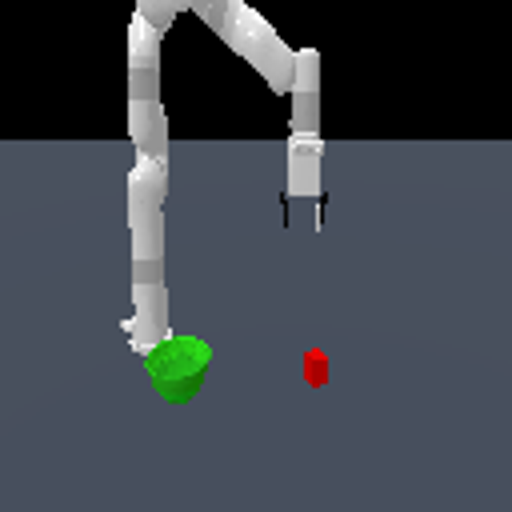

In [7]:
from PIL import Image
Image.fromarray(obs["image"]["front_camera"]["rgb"]).resize((512, 512))